In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import math
from copy import deepcopy
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
uber= pd.read_csv("C:\\Users\\agraw\\.vscode\\jupyternotebook\\uber analysis\\uber.csv", index_col=0)
uber.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 24238194 to 11951496
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                200000 non-null  object 
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 13.7+ MB


There is 1 row that has missing dropoff_longitude and dropoff_latitude. This is not many so to make it simple, we will remove it from the dataset.

In [4]:
df=uber.dropna()

In [5]:
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...
42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [6]:
num_col=df.select_dtypes(exclude=object).columns

In [7]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


boxploting to omit ouliers

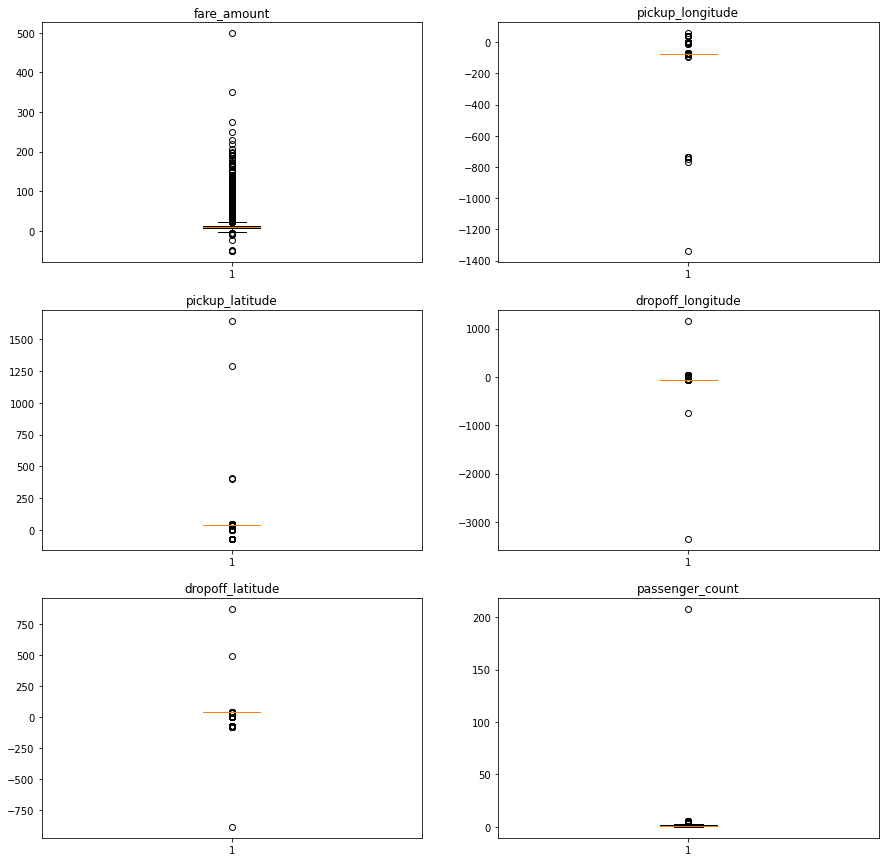

In [8]:
fig, plot = plt.subplots(3,2, figsize=(15,15))
for i in range(6):
    data = df[num_col[i]]
    data = data[~data.isna()]
    plot[math.floor(i / 2), i % 2].boxplot(data)
    plot[math.floor(i / 2), i % 2].set_title(f'{num_col[i]}')

according to map box
"Latitude and longitude are a pair of numbers (coordinates) used to describe a position on the plane of a geographic coordinate system. The numbers are in decimal degrees format and range from -90 to 90 for latitude and -180 to 180 for longitude."
so we will consider outside this range ouliers
also fare can't be negative so we will omit neg data points
and from passenger_count we can clearly se the 200 abnormal passenger an oulier so we will also omit it.

In [9]:
df=df[(-180<df['dropoff_longitude'])& (df['dropoff_longitude']<180)&
      (-180<df['pickup_longitude'])& (df['pickup_longitude']<180)&
      (-90<df['dropoff_latitude'])& (df['dropoff_latitude']<90)&
      (-90<df['dropoff_latitude'])& (df['dropoff_latitude']<90)&
      (0<df['passenger_count'])& (df['passenger_count']<50)&
      (0<df['fare_amount'])]

In [10]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [11]:
def haversine(lon1, lat1, lon2, lat2):
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    b = 2 * np.arcsin(np.sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return b * r
df['Distance'] = haversine(df['pickup_longitude'],df['pickup_latitude'], df['dropoff_longitude'], df['dropoff_latitude'])
df.head()

C:\Users\agraw\AppData\Local\Temp/ipykernel_15880/3491777037.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Distance'] = haversine(df['pickup_longitude'],df['pickup_latitude'], df['dropoff_longitude'], df['dropoff_latitude'])


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475450


{'whiskers': [<matplotlib.lines.Line2D at 0x16dbdc372e0>,
 'caps': [<matplotlib.lines.Line2D at 0x16dbdc37a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x16dbdc29f10>],
 'medians': [<matplotlib.lines.Line2D at 0x16dbdc46160>],
 'fliers': [<matplotlib.lines.Line2D at 0x16dbdc464f0>],
 'means': []}

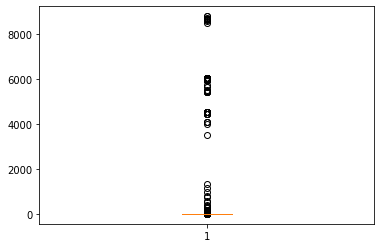

In [12]:
plt.boxplot(df['Distance'])

There are many trips with >2000km distance these are ouliers so we must omit them

In [13]:
df=df[(df['Distance']<2000) & (df['Distance']>0)]
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475450


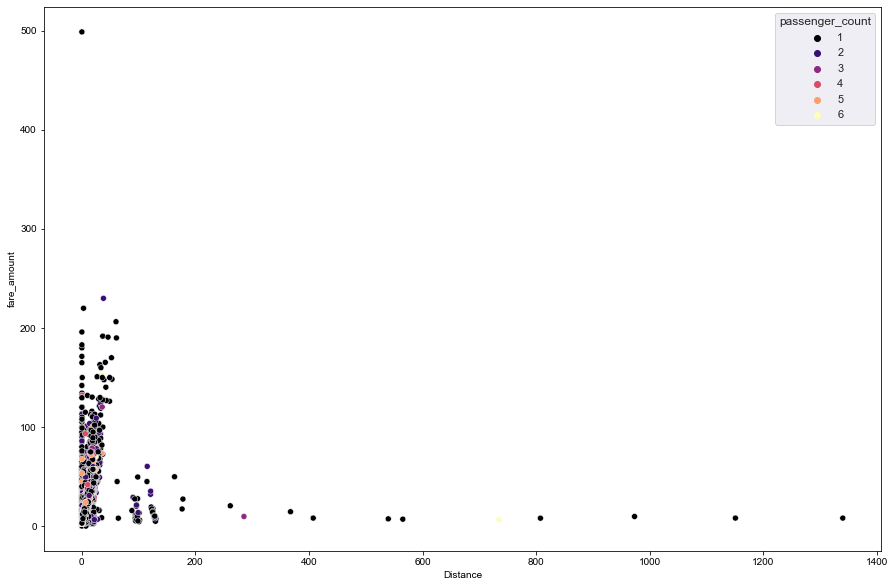

In [14]:
plt.subplots(figsize=(15,10))
sns.set(style='darkgrid')
sns.scatterplot(data=df, x='Distance', y='fare_amount', hue='passenger_count',palette='magma');

Serveral non-possible issues we can see:
Over 200km trips (with very low fee)
Over 200Rs fee but (but very short trip)
These abnormal trips should be omitted.

In [15]:
df=df[(df['Distance']<200) & (df['fare_amount']<200)]

plt.subplots(figsize=(15,10))
sns.set(style='darkgrid')
sns.scatterplot(data=df, x='Distance', y='fare_amount', hue='passenger_count',palette='magma');

We can still see some trips distance is close to 0 but have really high cost and those with very long distance
but low fare. So lets put threshold over there.

In [16]:
df = df.drop(df[(df['fare_amount'] > 100) & (df['Distance'] < 5)].index)
df = df.drop(df[(df['fare_amount'] < 100) & (df['Distance'] > 50)].index)


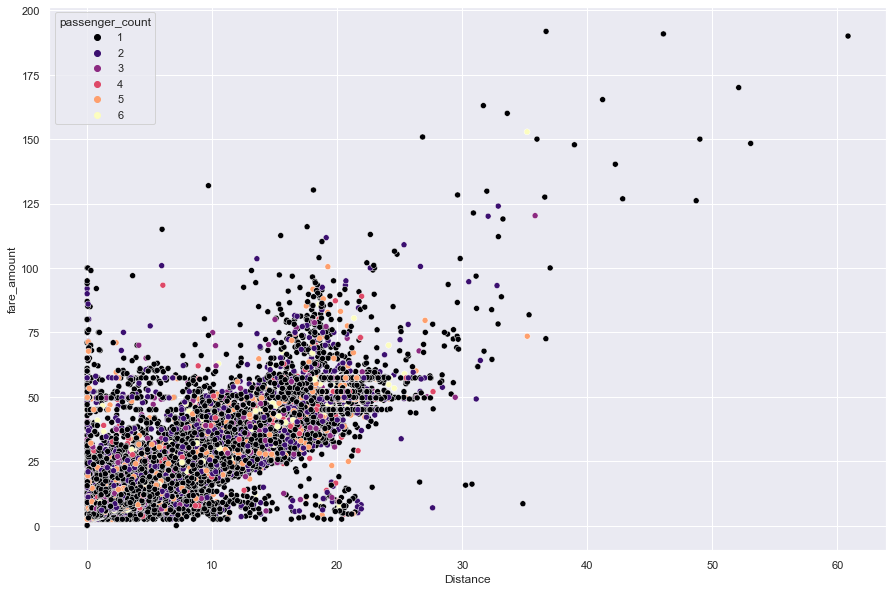

In [17]:
plt.subplots(figsize=(15,10))
sns.set(style='darkgrid')
sns.scatterplot(data=df, x='Distance', y='fare_amount', hue='passenger_count',palette='magma');

After omiting all the abnormal trips now we have better correlation between distance and fare amount

<AxesSubplot:>

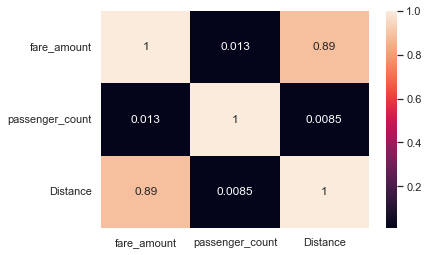

In [18]:
matrix = df[['fare_amount', 'passenger_count', 'Distance']].corr()
sns.heatmap(matrix, annot=True)

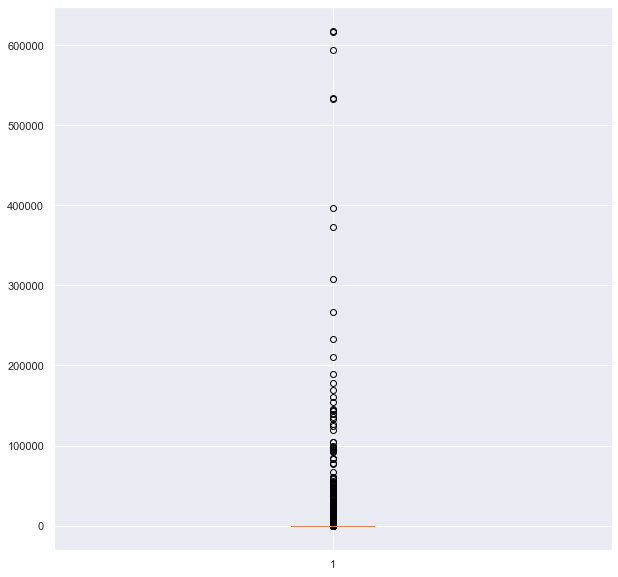

In [19]:
df['avg_amount_per_km'] = df['fare_amount'] / df['Distance']
plt.figure(figsize=(10,10))
plt.boxplot(df['avg_amount_per_km']);

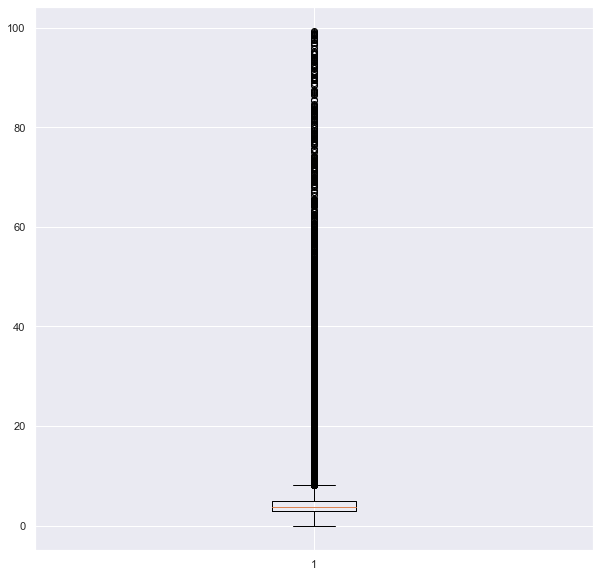

In [20]:
df=df[(df['avg_amount_per_km']<100)]
plt.figure(figsize=(10,10))
plt.boxplot(df['avg_amount_per_km']);

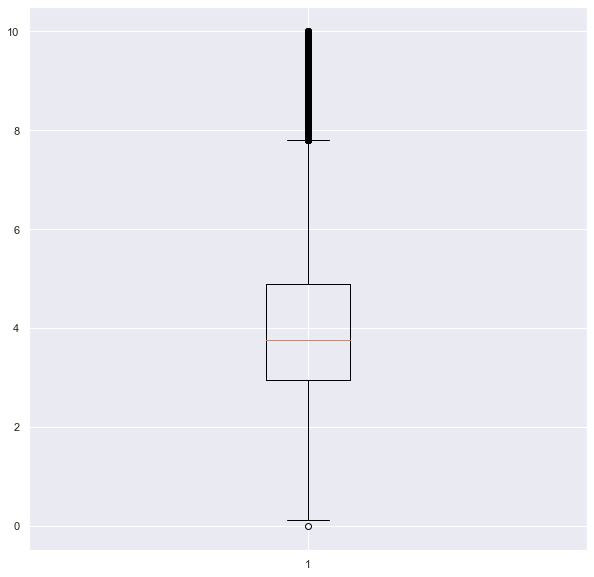

In [21]:
df=df[(df['avg_amount_per_km']<10)]
plt.figure(figsize=(10,10))
plt.boxplot(df['avg_amount_per_km']);

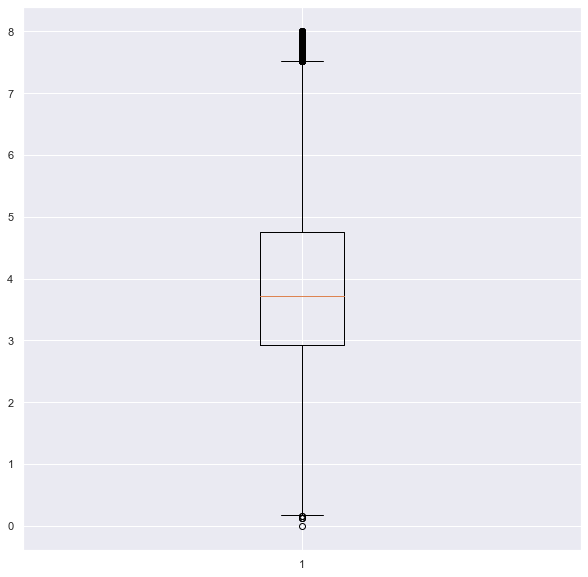

In [22]:
df=df[(df['avg_amount_per_km']<8)]
plt.figure(figsize=(10,10))
plt.boxplot(df['avg_amount_per_km']);

In [23]:
df['avg_amount_per_km'].mean(), df['avg_amount_per_km'].median()

(3.955868757436718, 3.7126822043705796)

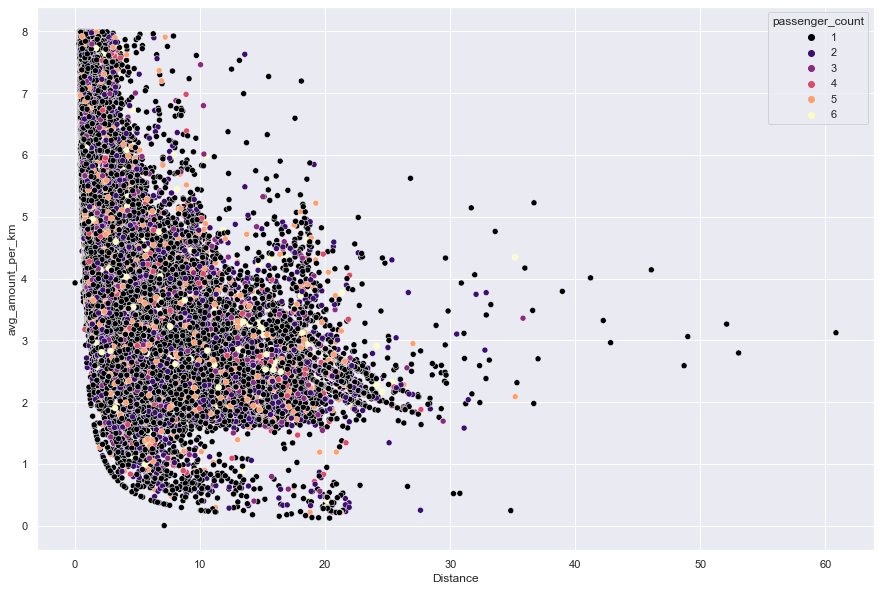

In [24]:
plt.subplots(figsize=(15,10))
sns.scatterplot(data=df, x='Distance', y='avg_amount_per_km',hue='passenger_count',palette='magma');

<AxesSubplot:>

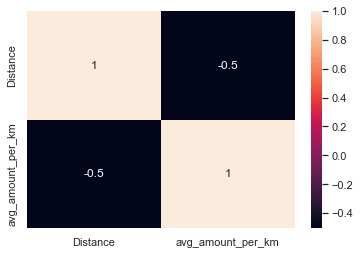

In [25]:
matrix = df[['Distance', 'avg_amount_per_km']].corr()
sns.heatmap(matrix, annot=True)

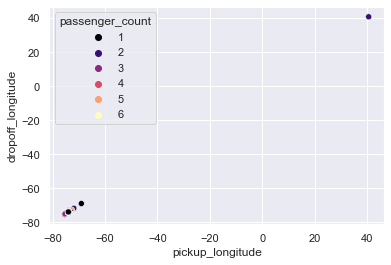

In [26]:
sns.scatterplot(data=df, x='pickup_longitude', y='dropoff_longitude',hue='passenger_count',palette='magma');

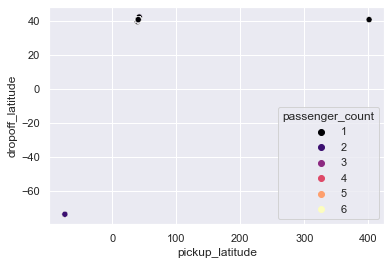

In [27]:
sns.scatterplot(data=df, x='pickup_latitude', y='dropoff_latitude',hue='passenger_count',palette='magma');

In [28]:
df.loc[(df['pickup_latitude'] > 30) & (df['pickup_longitude'] < -60), 'Location'] = 'Group 1'
df.loc[(df['pickup_latitude'] < 30) & (df['pickup_longitude'] > -60), 'Location'] = 'Group 2'
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,avg_amount_per_km,Location
24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,4.455474,Group 1
27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,3.133151,Group 1
44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,2.561365,Group 1
25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,3.189536,Group 1
17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,3.575060,Group 1


In [29]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['weekday'] = df['pickup_datetime'].dt.day_name()
df['year']=df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['hour'] = df['pickup_datetime'].dt.hour

In [30]:
df = df.drop(['key', 'pickup_datetime'], axis=1, errors='ignore')
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,avg_amount_per_km,Location,weekday,year,month,hour
24238194,7.5,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,4.455474,Group 1,Thursday,2015,5,19
27835199,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,3.133151,Group 1,Friday,2009,7,20
44984355,12.9,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,2.561365,Group 1,Monday,2009,8,21
25894730,5.3,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,3.189536,Group 1,Friday,2009,6,8
17610152,16.0,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,3.575060,Group 1,Thursday,2014,8,17


(3.0, 4.595799582983545)

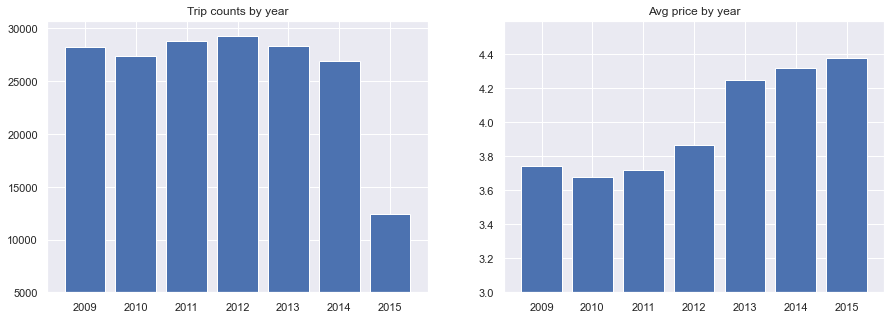

In [31]:
temp = deepcopy(df)
temp['temp'] = np.zeros(temp.shape[0])
groupby_year = temp.groupby('year')
countby_year = groupby_year['temp'].count()
avg_amount_by_year = groupby_year['avg_amount_per_km'].mean()

fig, plot = plt.subplots(1, 2, figsize=(15,5))

plot[0].bar(countby_year.index, countby_year)
plot[0].set_title('Trip counts by year')
plot[0].set_ylim(5000)

plot[1].bar(avg_amount_by_year.index, avg_amount_by_year)
plot[1].set_title('Avg price by year')
plot[1].set_ylim(3)

The data in 2015 is not fully collected, which makes it hard to conclude about the trend of uber users throughout time. However, it is shown the that average price gradually increase after years. So let's omit 2015 data.

In [32]:
temp=temp[(temp['year']<2015)]

(3.8, 4.1)

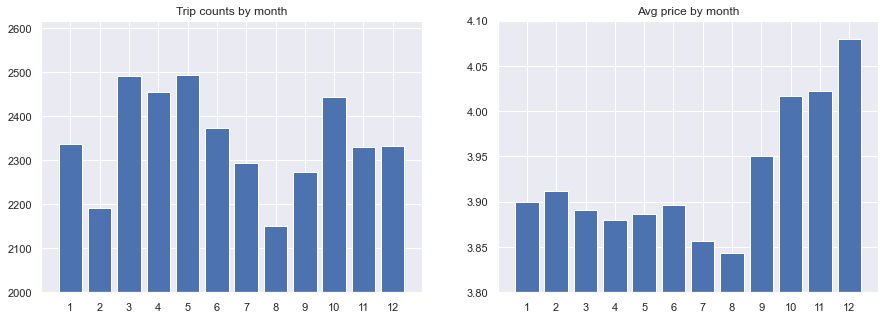

In [33]:
groupby_month = temp.groupby(['month','year'])
countby_month = groupby_month['temp'].count().groupby('month').mean()
avg_amount_by_month = groupby_month['avg_amount_per_km'].mean().groupby('month').mean()

fig, plot= plt.subplots(1,2,figsize=(15,5))

plot[0].bar(countby_month.index,countby_month)
plot[0].set_xticks([i for i in range(1,13)])
plot[0].set_title('Trip counts by month')
plot[0].set_ylim(2000)

plot[1].bar(avg_amount_by_month.index, avg_amount_by_month)
plot[1].set_xticks([i for i in range(1,13)])
plot[1].set_title('Avg price by month')
plot[1].set_ylim(3.8,4.1)

(3.5, 4.1)

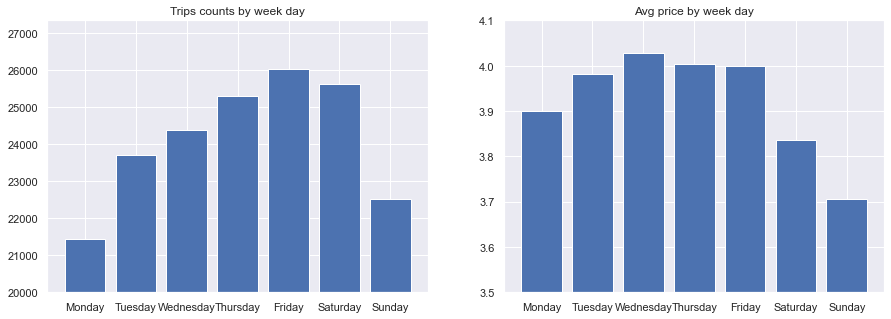

In [34]:
weekday =['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

groupby_day = temp.groupby(['weekday'])
countby_day=groupby_day['temp'].count().reindex(weekday)
avg_amount_by_day=groupby_day['avg_amount_per_km'].mean().reindex(weekday)
fig, plot=plt.subplots(1,2,figsize=(15,5))
plot[0].bar(countby_day.index,countby_day)
plot[0].set_title('Trips counts by week day')
plot[0].set_ylim(20000)

plot[1].bar(avg_amount_by_day.index,avg_amount_by_day)
plot[1].set_title('Avg price by week day')
plot[1].set_ylim(3.5,4.1)

<AxesSubplot:xlabel='hour', ylabel='weekday'>

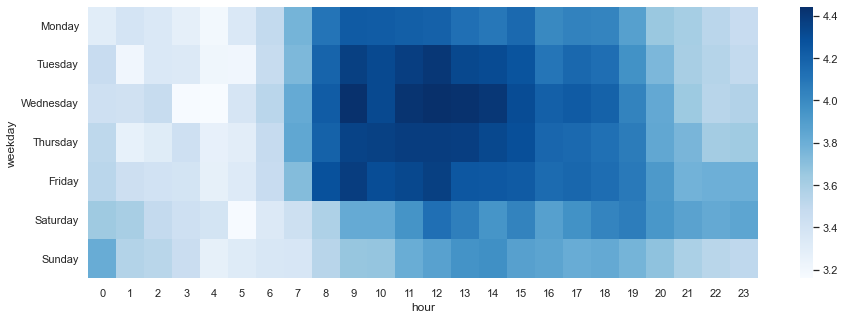

In [35]:
avg_amount_by_hour = temp.groupby(['hour','weekday'])['avg_amount_per_km'].mean()
avg_amount_by_hour = avg_amount_by_hour.unstack(level=0).reindex(weekday)
plt.figure(figsize=(15,5))
sns.heatmap(avg_amount_by_hour,cmap='Blues')

Difference in cost:   
0AM - 7AM: low cost, 
8AM - 3PM: high cost, 
4PM - 7PM: medium cost, 
8PM - 0AM: low cost, 

In [36]:
temp = deepcopy(df)
def day(x):
    if x in ['Monday','Tuesday','Wednesday','Thursday','Friday']:
        return 'workingday'
    else:
        return 'weekend'
def time(x):
    if 0<x<7:
        return 'early_morning'
    if x<15:
        return 'morning_&_afternoon'
    if x<19:
        return 'evening'
    else:
        return 'night'
df['weekday']= temp['weekday'].apply(day)
df['hour']=temp['hour'].apply(time)

In [37]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,avg_amount_per_km,Location,weekday,year,month,hour
24238194,7.5,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,4.455474,Group 1,workingday,2015,5,night
27835199,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,3.133151,Group 1,workingday,2009,7,night
44984355,12.9,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,2.561365,Group 1,workingday,2009,8,night
25894730,5.3,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,3.189536,Group 1,workingday,2009,6,morning_&_afternoon
17610152,16.0,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,3.575060,Group 1,workingday,2014,8,evening


In [38]:
updated_df = pd.get_dummies(df[['passenger_count', 'Distance',
                                    'month', 'hour', 'year',
                                   'weekday', 'fare_amount', 'Location']], columns=['weekday', 'hour', 'Location'])

def z_score(x):
    return (x - x.mean()) / x.std()
    
update = ['passenger_count', 'Distance']
for col in update:
    updated_df[col] = z_score(updated_df[col])

updated_df.head()

,passenger_count,Distance,month,year,fare_amount,weekday_weekend,weekday_workingday,hour_early_morning,hour_evening,hour_morning_&_afternoon,hour_night,Location_Group 1,Location_Group 2
24238194,-0.527722,-0.504915,5,2015,7.5,0,1,0,0,0,1,1,0
27835199,-0.527722,-0.292630,7,2009,7.7,0,1,0,0,0,1,1,0
44984355,-0.527722,0.414409,8,2009,12.9,0,1,0,0,0,1,1,0
25894730,1.008069,-0.510848,6,2009,5.3,0,1,0,0,1,0,1,0
17610152,2.543860,0.260617,8,2014,16.0,0,1,0,1,0,0,1,0


In [39]:
X = updated_df.loc[:, ~updated_df.columns.isin(['fare_amount'])]
X = sm.add_constant(X)

y = updated_df['fare_amount']
model = sm.OLS(y, X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                 1.315e+05
Date:                Sat, 18 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:39:37   Log-Likelihood:            -4.8218e+05
No. Observations:              181393   AIC:                         9.644e+05
Df Residuals:                  181383   BIC:                         9.645e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -474.5724      3.932   -120.704      0.000    -482.279    -466.866
passenger_count              0.0598      0.008      7.361      0.000       0.044       0.076
Distance                     8.7477      0.008   1074.598      0.000       8.732       8.764
month                        0.0644      0.002     27.105      0.000       0.060       0.069
year                         0.5365      0.004    122.097      0.000       0.528       0.545
weekday_weekend           -237.4681      1.966   -120.788      0.000    -241.321    -233.615
weekday_workingday        -237.1043      1.966   -120.617      0.000    -240.957    -233.252
hour_early_morning        -119.5257      0.983   -121.571      0.000    -121.453    -117.599
hour_evening              -118.0068      0.983   -120.065      0.000    -119.933    -116.080
hour_morning_&_afternoon  -118.1340      0.983   -120.176      0.000    -120.061    -116.207
hour_night                -118.9060      0.983   -120.940      0.000    -120.833    -116.979
Location_Group 1          -238.0094      1.969   -120.889      0.000    -241.868    -234.151
Location_Group 2          -236.5630      1.983   -119.309      0.000    -240.449    -232.677
==============================================================================
Omnibus:                   111822.186   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         21354808.777
Skew:                           1.918   Prob(JB):                         0.00
Kurtosis:                      56.016   Cond. No.                     2.83e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.14e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
def fit_and_predict(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r_squared = model.score(X_test, y_test)
    RMSE = mean_squared_error(y_test, y_pred, squared=False)
    print('R-squared: ', r_squared)
    print('RMSE: ', RMSE)
    compare_distribution(y_test, y_pred)
    
def compare_distribution(y_test, y_pred):
    fig, plot = plt.subplots(1, 2, figsize=(16, 5))

    plot[0].hist(y_test, bins=100)
    plot[0].set_title('Actual distribution of fare_amount')
    plot[1].hist(y_pred, bins=100)
    plot[1].set_title('Predicted distribution of fare_amount');

R-squared:  0.8683684896324863
RMSE:  3.4509551678427766


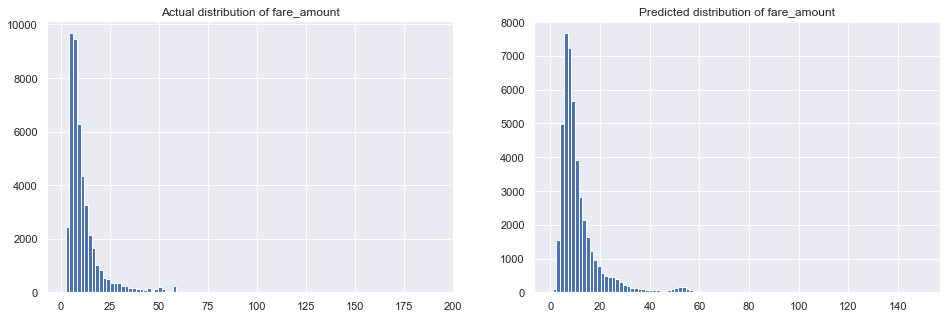

In [41]:
from sklearn.linear_model import LinearRegression

lr= LinearRegression()  
fit_and_predict(lr)

In [42]:
def Regression_func(X,y):
    from sklearn.linear_model import LinearRegression 
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
    X_train,X_test,y_train,y_test=train_test_split (X,y,test_size=2,random_state=42)
    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E= ElasticNet()
    ExTree= ExtraTreeRegressor()
    VC= GradientBoostingRegressor()
    KNN= KNeighborsRegressor()
    algos=[L,R,Lass,E,ExTree,VC,KNN]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor','GradientBoostingRegressor'
                ,'KNeighborsRegressor']
    r_squared=[]
    mse=[]
    mae=[]
    result=pd.DataFrame(columns=['R_squared','MSE','MAE'],index=algo_names)
    for item in algos:
        item.fit(X_train, y_train)
        item.predict(X_test)
        r_squared.append(r2_score(y_test,item.predict(X_test)))
        mse.append(mean_squared_error(y_test,item.predict(X_test)))
        mae.append(mean_absolute_error(y_test,item.predict(X_test)))
    result.R_squared= r_squared
    result.MSE=mse
    result.MAE=mae
    return result.sort_values('R_squared',ascending=False)

In [43]:
Regression_func(X,y)

,R_squared,MSE,MAE
ExtraTreeRegressor,0.980892,0.845000,0.850000
Lasso,0.899428,4.447551,1.953724
ElasticNet,0.861211,6.137595,2.101531
Ridge,0.829137,7.555997,2.484555
LinearRegression,0.828957,7.563938,2.486304
GradientBoostingRegressor,0.683366,14.002346,3.366595
KNeighborsRegressor,0.578871,18.623378,3.883000
